**Coeficientes multipaso para adam moulton**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
from scipy.integrate import odeint

In [3]:
t=sym.Symbol('t',Real=True)
h=sym.Symbol('h',Real=True)

**Adam bashfort demostración**

2 puntos

In [4]:
F1= (t-(-h))/h
F2 = -( t - 0 )/h

In [5]:
I1 = sym.integrate(F1,(t,0,h))
I1

3*h/2

In [6]:
I2 = sym.integrate(F2,(t,0,h))
I2

-h/2

3 puntos 

In [7]:
F4=((t)/(-2*h))*((t+h)/(-h))
F6=((t+2*h)/(h))*((t)/(-h))
F5=((t+h)/h)*((t+2*h)/(2*h))

In [8]:
I5 = sym.integrate(F5,(t,0,h))
I5

23*h/12

In [9]:
I6 = sym.integrate(F6,(t,0,h))
I6

-4*h/3

In [10]:
I4 = sym.integrate(F4,(t,0,h))
I4

5*h/12

4 puntos 

In [11]:
F8=((t+2*h)/-h)*((t+h)/(-2*h))*(t/(-3*h))

F9=((t+3*h)/h)*((t+h)/(-h))*(t/(-2*h))

F10=((t)/-h)*((t+3*h)/(2*h))*((t+2*h)/(h))

F11=((t+h)/(h))*((t+2*h)/(2*h))*((t+3*h)/(3*h))

In [12]:
I11 = sym.integrate(F11,(t,0,h))
I11

55*h/24

In [13]:
I10 = sym.integrate(F10,(t,0,h))
I10

-59*h/24

In [14]:
I9 = sym.integrate(F9,(t,0,h))
I9

37*h/24

In [15]:
I8 = sym.integrate(F8,(t,0,h))
I8

-3*h/8

**Adam Moulton**

3 puntos

In [16]:
F4=(t/h)*((t+h)/(2*h))
F6=((t-h)/(h))*((t+h)/(-h))
F5=(t/-h)*((t-h)/(-2*h))

In [17]:
I5 = sym.integrate(F5,(t,0,h))
I5

-h/12

In [18]:
I6 = sym.integrate(F6,(t,0,h))
I6

2*h/3

In [19]:
I4 = sym.integrate(F4,(t,0,h))
I4

5*h/12

 4 puntos

In [20]:
F8=((t+h)/-h)*((t-h)/(-3*h))*(t/(-2*h))

F9=((t+2*h)/h)*((t-h)/(-2*h))*(t/(-h))

F10=((t-h)/-h)*((t+2*h)/(2*h))*((t+h)/(h))

F11=((t+2*h)/(3*h))*((t+h)/(2*h))*(t/(h))

In [21]:
I8 = sym.integrate(F8,(t,0,h))
I8

h/24

In [22]:
I9 = sym.integrate(F9,(t,0,h))
I9

-5*h/24

In [23]:
I10 = sym.integrate(F10,(t,0,h))
I10

19*h/24

In [24]:
I11 = sym.integrate(F11,(t,0,h))
I11

3*h/8

5 puntos

In [25]:
F12=((t+h)/(-h))*((t-h)/(-3*h))*(t/(-2*h))*((t+3*h)/(h))
 
F13=((t+2*h)/h)*((t-h)/(-2*h))*(t/(-h))*((t+3*h)/(2*h))

F14=((t-h)/-h)*((t+2*h)/(2*h))*((t+h)/(h))*((t+3*h)/(3*h))

F15=((t+2*h)/(3*h))*((t+h)/(2*h))*(t/(h))*((t+3*h)/(4*h))

F16=((t+2*h)/(-h))*((t+h)/(-2*h))*(t/(-3*h))*((t-h)/(-4*h))

In [26]:
I16 = sym.integrate(F16,(t,0,h))
I16

-19*h/720

In [27]:
I12 = sym.integrate(F12,(t,0,h))
I12

53*h/360

In [28]:
I13 = sym.integrate(F13,(t,0,h))
I13

-11*h/30

In [29]:
I14 = sym.integrate(F14,(t,0,h))
I14

323*h/360

In [30]:
I15 = sym.integrate(F15,(t,0,h))
I15

251*h/720

**Código integrador Adam para funciones**

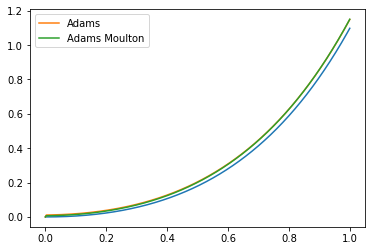

In [31]:
def f(x,y):
    return x + 2*y
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

t = np.linspace(0,1,1000)
h = t[1] - t[0]
yext = Solucion(t)

def RungeKutta4(x,y,h,f):
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])# f en el presente
        k2= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+k3*h)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)#RungeKutta

#Se inicia con RungeKutta
y4 = np.zeros_like(t)
y4[0] = 0
RungeKutta4(t,y4,h,f)

def GetAdams_45(f,x,yrk1):
    
    h = x[1] - x[0]
    
    y = yrk1.copy()
    
    yc = y.copy()
    
    #En i esta el futuro y en i-1 el presente 
    for i in range(1,len(x)):
        #Bashfort 4 puntos
        y[i] = y[i-1] +(1/24)*h*(55*f(x[i-4],y[i-4])-59*f(x[i-3],y[i-3])+37*f(x[i-2],y[i-2])-9*f(x[i-1],y[i-1]))
        
        yc[i] = y[i]
        #Bashfort Multoun 5 puntos
        yc[i] = yc[i-1] +(1/720)*h*(251*f(x[i],y[i])+646*f(x[i-4],y[i-4])-264*f(x[i-3],y[i-3])+106*f(x[i-2],y[i-2])-19*f(x[i-1],y[i-1]))
        
    
    return y,yc

ybash2,ymoulton2 = GetAdams_45(f,t,y4)
plt.plot(t,y4)
plt.plot(t,ybash2,label='Adams')
plt.plot(t,ymoulton2,label='Adams Moulton')
plt.legend()

**Integrador Adam 4-5 para sistemas**

In [32]:
def System (r,t,mu=1.5):
    x,vx=r
    dxdt=vx
    dvxdt=mu*(1-x**2)*vx-x
    
    return np.array([dxdt,dvxdt])

t=np.linspace(0,20,1000)
r0=[0.5,0.]
sol=odeint(System,r0,t,args=(1.3,))

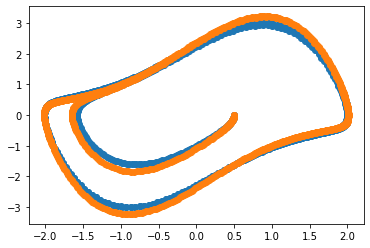

In [33]:
def GetEulerSystem4(f,r0,t):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    x[1] = r0[1]
    
    K1=np.zeros(2)
    K2=np.zeros(2)
    K3=np.zeros(2)
    K4=np.zeros(2)
    R=np.zeros(2)
    
    for i in range(1,len(t)):
        R=np.array([x[i-1],vx[i-1]])
        K1=f(R,t[i-1])
        
        R=np.array([x[i-1]+0.5*h*K1[0],vx[i-1]+0.5*h*K1[1]])
        K2=f(R,t[i-1])
        
        R=np.array([x[i-1]+0.5*h*K2[0],vx[i-1]+0.5*h*K2[1]])
        K3=f(R,t[i-1])
        
        R=np.array([x[i-1]+h*K3[0],vx[i-1]+h*K3[1]])
        K4=f(R,t[i-1])
        
        x[i] = x[i-1] + h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6
        vx[i]=vx[i-1]+h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6
        
    return x,vx

x,vx= GetEulerSystem4(System,r0,t)
plt.scatter(sol[:,0],sol[:,1])
plt.scatter(x,vx)

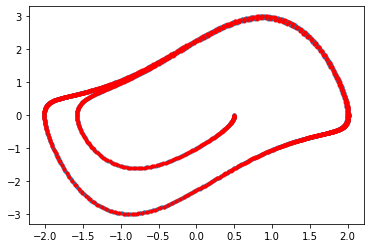

In [34]:
#Empezando con rungekutta
def AdamsIntegrator_45(f,r0,t,mu):
    
    h = t[1] - t[0]
    x=np.zeros_like(t)
    vx=np.zeros_like(t)
    
    x[0]=r0[0]
    vx[0]=r0[1]
    
    K11=np.zeros(2)
    K12=np.zeros(2)
    K13=np.zeros(2)
    K14=np.zeros(2)
    K15=np.zeros(2)
    
    # RungeKutta
    
    K11=f(np.array([x[0],vx[0]]),t[0],mu)
    K12=f(np.array([x[0]+0.5*h*K11[0],vx[0]+0.5*h*K11[1]]),t[0],mu)
    K13=f(np.array([x[0]+0.5*h*K12[0],vx[0]+0.5*h*K12[1]]),t[0],mu)
    K14=f(np.array([x[0]+h*K13[0],vx[0]+h*K13[1]]),t[0],mu)
        
    x[1] = x[0] + h*(K11[0]+2*K12[0]+2*K13[0]+K14[0])/6
    vx[1]= vx[0] + h*(K11[1]+2*K12[1]+2*K13[1]+K14[1])/6
    
    xc=x.copy()
    vxc=vx.copy()
    
    for i in range(1,len(t)):
        
        K11=f(np.array([x[i-1],vx[i-1]]),t[i-1],mu)
        K12=f(np.array([x[i-2],vx[i-2]]),t[i-2],mu)
        K13=f(np.array([x[i-3],vx[i-3]]),t[i-3],mu)
        K14=f(np.array([x[i-4],vx[i-4]]),t[i-4],mu)
        
        x[i]=x[i-1]+(1/24)*h*(55*K11[0]-59*K12[0]+37*K13[0]-9*K14[0])
        vx[i]=vx[i-1]+(1/24)*h*(55*K11[1]-59*K12[1]+37*K13[1]-9*K14[1])
        
        xc[i]=x[i]
        vxc[i]=vx[i]
        
        #futuro
        K15=f(np.array([x[i],vx[i]]),t[i],mu)
        
        xc[i]= xc[i-1]+(1/720)*h*(251*K15[0]+646*K11[0]-264*K12[0]+106*K13[0]-19*K14[0])
        vxc[i]= vxc[i-1]+(1/720)*h*(251*K15[1]+646*K11[1]-264*K12[1]+106*K13[1]-19*K14[1])
        
    return x,vx,xc,vxc

sol2=AdamsIntegrator_45(System,r0,t,1.3)
plt.scatter(sol[:,0],sol[:,1],marker='.')
plt.scatter(sol2[0],sol2[1],color='r',marker='.')